In [22]:
#%matplotlib inline
%matplotlib notebook

If we are working in JupyterLab, we need to use "inline" and don't have interactive plots

If we are working in regular Jupyter (tree), we can use "notebook" for interactive plots

In [23]:
import os
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

In [24]:
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend('matplotlib')
import lsst.afw.geom as afwGeom
import lsst.daf.persistence as dafPersist

We have imported some standard python libraries and some special LSST ones. Now we will tell python where the LSST data repository is and use the "Butler" to access it.

In [4]:
repo = '/epyc/users/mrawls/premap2019/hits-lsst/hits2015/rerun/highres1'
butler = dafPersist.Butler(repo)

Let's also tell python where the database is that contains the results from all the data processing. The steps are image processing (flat fields etc.), subtracting the processed image from a template, finding sources that remain, and associating those sources with past observations.

In [6]:
dbName = 'association.db'
dbPath = os.path.join(repo, dbName)

In [7]:
print(dbPath)

/epyc/users/mrawls/premap2019/hits-lsst/hits2015/rerun/highres1/association.db


In [27]:
#testDataId = {'visit': 411673, 'ccdnum': 47}
testDataId = {'visit': 413696, 'ccdnum': 47}

In [28]:
processedImage = butler.get('calexp', dataId=testDataId)

<IPython.core.display.Javascript object>


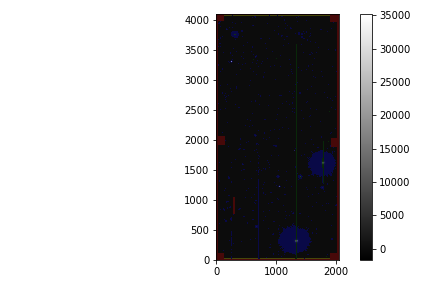

In [29]:
display = afwDisplay.Display(frame=1)
display.mtv(processedImage)
display.setMaskTransparency(50)
display.scale('asinh', 'zscale', Q=8)
display.show_colorbar()

In [31]:
differenceImage = butler.get('deepDiff_differenceExp', dataId=testDataId)

<IPython.core.display.Javascript object>


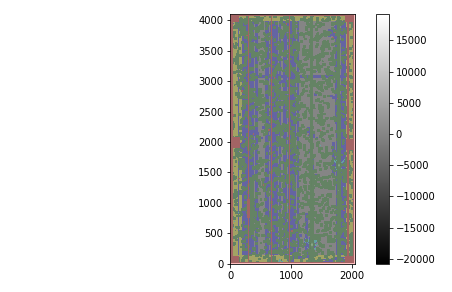

In [33]:
display2 = afwDisplay.Display(frame=2)
display2.mtv(differenceImage)
display2.setMaskTransparency(50)
display2.scale('asinh', 'zscale', Q=8)
display2.show_colorbar()

We have used the butler to get (retrieve) both a processed image (calexp) and a difference image. We then used afwDisplay with matplotlib to display them.
Next, we will look at the database at the end of the pipeline to see what sources were detected in all the visits and all the ccds together.

In [34]:
# Meredith wrote some handy function we'll be using sometimes so this is a hack to access them
import sys
sys.path.append('/epyc/users/mrawls/premap2019/ap_pipe-notebooks')
from diaObjectAnalysis import loadAllPpdbObjects, loadAllPpdbSources, plotDiaObjectsOnSky
import plotLightcurve as plc

In [35]:
objTable = loadAllPpdbObjects(repo, dbName)

In [39]:
print(len(objTable))
objTable[0:5]

110157


,diaObjectId,ra,decl,nDiaSources,gPSFluxMean,validityEnd,flags
0,176486781787570292,151.197871,2.221515,1,NaN,None,1
1,176486781787570326,150.997772,2.329394,1,160.158040,None,1
2,176486781787570340,151.078542,2.322744,1,10953.513450,None,1
3,176486713068093591,149.839390,2.613432,1,2032.066961,None,1
4,176486713068093600,149.869474,2.552636,1,NaN,None,1


<IPython.core.display.Javascript object>


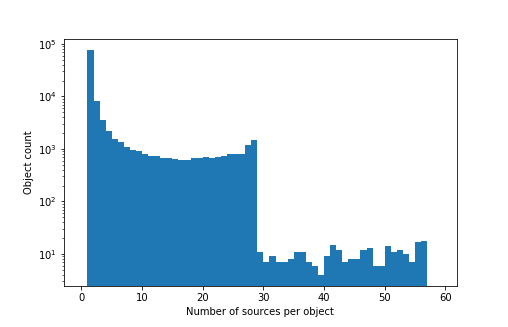

Text(0, 0.5, 'Object count')

In [42]:
plt.figure()
plt.hist(objTable['nDiaSources'].values, bins=np.arange(0, 60))
plt.yscale('log')
plt.xlabel('Number of sources per object')
plt.ylabel('Object count')

Sources are things that we detect in a difference image. Objects are a set of sources that are associated together because they're in the same place